In [119]:
import os
os.chdir("/Users/nickl/Documents/College/DATA 481 - Gene Data")

In [120]:
import pandas as pd
mdf = pd.read_csv("normalized_expression.csv") #loading dataset
mapdf = pd.read_csv("gene_mappings.csv") #loading mappings dataset
metadf = pd.read_csv("metadata.csv") #loading metadata dataset

In [121]:
#merging mapping df with gene expression df
mdf.rename(columns={'Unnamed: 0': 'ENSEMBLID'}, inplace=True)
mdf = pd.merge(mdf, mapdf, on =  "ENSEMBLID", how='left')
mdf.set_index("ENSEMBLID", inplace=True)
mdf.head()


,TCGA-B6-A0IG-01A-11R-A034-07,TCGA-BH-A0HQ-01A-11R-A034-07,TCGA-BH-A18G-01A-11R-A12D-07,TCGA-A8-A09K-01A-11R-A00Z-07,TCGA-BH-A0BZ-01A-31R-A12P-07,TCGA-A1-A0SD-01A-11R-A115-07,TCGA-A1-A0SF-01A-11R-A144-07,TCGA-A1-A0SI-01A-11R-A144-07,TCGA-A1-A0SJ-01A-11R-A084-07,TCGA-A1-A0SK-01A-12R-A084-07,...,TCGA-41-2572-01A-01R-1850-01,TCGA-06-0138-01A-02R-1849-01,TCGA-06-0211-01A-01R-1849-01,TCGA-06-0178-01A-01R-1849-01,TCGA-28-2499-01A-01R-1850-01,TCGA-06-1804-01A-01R-1849-01,TCGA-26-1442-01A-01R-1850-01,TCGA-28-1747-01C-01R-1850-01,GENESYMBOL,GENETYPE
ENSEMBLID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,11.643945,12.660240,12.011286,10.902371,9.778870,11.086341,13.304347,11.204773,12.835616,12.470305,...,12.294185,12.843887,12.083013,13.196523,13.764084,11.588476,12.021739,12.586284,TSPAN6,protein_coding
ENSG00000000005,3.527251,1.141077,0.000000,2.923184,3.371978,5.487672,3.474578,2.517265,7.229333,0.000000,...,3.783844,5.468667,3.113357,3.538314,3.256006,2.887933,2.922775,3.424977,TNMD,protein_coding
ENSG00000000419,11.004391,10.379188,10.492609,10.625022,12.325179,11.250164,10.834781,11.193174,12.695187,11.631386,...,10.692166,11.044221,10.430246,11.321920,10.528515,10.027390,10.016298,10.270992,DPM1,protein_coding
ENSG00000000457,10.216685,10.975065,10.788455,11.340000,10.827489,10.294248,10.472310,11.166237,10.304750,9.737110,...,8.542477,9.221241,8.977203,10.255138,8.946696,8.857296,9.003882,9.138294,SCYL3,protein_coding
ENSG00000000460,9.076165,9.584343,9.316149,8.781399,9.825582,8.366424,8.994853,10.627795,9.219602,10.100473,...,8.379882,8.966339,8.967783,10.208429,7.872731,7.985417,7.840538,8.497433,C1orf112,protein_coding


In [122]:
print(mdf.shape)

(60616, 785)


In [123]:
#filtering for only protein coding genes
fmdf = mdf.loc[mdf["GENETYPE"] == "protein_coding", :]
print(fmdf.shape)

(19944, 785)


In [124]:
tdf = fmdf.T
print(tdf.shape)

(785, 19944)


In [125]:
#Removing all genes with over 50% zeroes
zero_proportion = (tdf == 0).sum() / (len(tdf) - 2) #subtracted 2 because of the added 2 columns for gene mapping

no0df = tdf.loc[:, zero_proportion < 0.5]

no0df.shape


(785, 17349)

In [126]:
#Removing all genes with means less than 10
genemaprows = no0df.loc[["GENETYPE","GENESYMBOL"]]
fno0df = no0df.drop(["GENETYPE", "GENESYMBOL"])
colmeans = fno0df.mean(axis = 0)
filtereddf = fno0df.loc[:,colmeans >= 10]
print(filtereddf.shape)


(783, 8094)


In [127]:
#taking top 2000 columns with highest variances
import numpy as np
variances = np.var(filtereddf, axis=0)
filtereddf.loc['variances'] = variances
filtereddf = filtereddf.sort_values(by='variances', axis=1, ascending=False)
finaldf = filtereddf.iloc[:, 0:2000]
print(finaldf.shape)
finaldf = finaldf.drop(index = "variances")


C:\Users\nickl\AppData\Local\Temp\ipykernel_9492\3561000705.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtereddf.loc['variances'] = variances


(784, 2000)


In [128]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [129]:
finaldf.head()

ENSEMBLID,ENSG00000110484,ENSG00000173467,ENSG00000160180,ENSG00000106541,ENSG00000086548,ENSG00000186081,ENSG00000164128,ENSG00000082175,ENSG00000012223,ENSG00000151892,...,ENSG00000183579,ENSG00000111640,ENSG00000141582,ENSG00000083444,ENSG00000077238,ENSG00000131378,ENSG00000162627,ENSG00000172428,ENSG00000090238,ENSG00000121310
TCGA-B6-A0IG-01A-11R-A034-07,16.604568,13.223057,16.503468,16.406028,16.432548,12.923043,6.321402,10.431743,12.610098,15.059847,...,9.49814,16.407849,11.891926,13.235186,12.394746,9.942146,8.553333,11.502764,10.531759,10.892306
TCGA-BH-A0HQ-01A-11R-A034-07,17.999684,12.796037,15.401028,15.135256,10.963789,13.592751,9.65723,13.523402,13.761161,15.761459,...,9.069928,15.914698,11.445023,13.502874,12.193215,11.164268,10.274965,10.937427,11.517999,12.172644
TCGA-BH-A18G-01A-11R-A12D-07,11.449702,3.660178,0.0,5.166983,10.137522,10.144959,14.228891,5.44917,18.585784,8.618219,...,9.609232,18.279752,10.998696,15.340948,12.148326,10.899602,10.838234,11.463646,12.285856,10.922859
TCGA-A8-A09K-01A-11R-A00Z-07,1.675843,13.126475,10.825054,12.800465,4.375425,7.43723,11.509252,9.890669,9.99521,16.164904,...,12.416744,15.469124,13.226838,11.836395,9.2028,9.810061,10.297798,11.573526,12.778097,12.220035
TCGA-BH-A0BZ-01A-31R-A12P-07,8.22205,11.830127,12.560654,14.547573,9.016715,11.662777,9.213446,7.501901,7.631275,14.109405,...,9.499313,16.13519,12.777781,13.686927,12.581818,11.524712,9.752092,10.692426,11.690135,10.532674


In [130]:
metadf.head()

,mRNA,PAM50,TumorPurity,ProliferationScore,ER,PR,HER2
0,TCGA-B6-A0IG-01A-11R-A034-07,LumA,0.73,-0.568397,Positive,Positive,Positive
1,TCGA-BH-A0HQ-01A-11R-A034-07,LumA,0.52,-0.821974,NaN,NaN,Negative
2,TCGA-BH-A18G-01A-11R-A12D-07,Basal,0.79,0.423067,Negative,Negative,Negative
3,TCGA-A8-A09K-01A-11R-A00Z-07,LumA,1.00,0.026868,Positive,Positive,Negative
4,TCGA-BH-A0BZ-01A-31R-A12P-07,LumB,0.37,0.247682,Positive,Positive,Negative


In [131]:
metadf.set_index("mRNA", inplace=True)
metadf = metadf.dropna(subset=['ER'])
print(metadf.head())
afinaldf = finaldf.loc[metadf.index]
print(afinaldf.head())




                              PAM50  TumorPurity  ProliferationScore  \
mRNA                                                                   
TCGA-B6-A0IG-01A-11R-A034-07   LumA         0.73           -0.568397   
TCGA-BH-A18G-01A-11R-A12D-07  Basal         0.79            0.423067   
TCGA-A8-A09K-01A-11R-A00Z-07   LumA         1.00            0.026868   
TCGA-BH-A0BZ-01A-31R-A12P-07   LumB         0.37            0.247682   
TCGA-A1-A0SF-01A-11R-A144-07   LumA         0.44           -0.709401   

                                    ER        PR      HER2  
mRNA                                                        
TCGA-B6-A0IG-01A-11R-A034-07  Positive  Positive  Positive  
TCGA-BH-A18G-01A-11R-A12D-07  Negative  Negative  Negative  
TCGA-A8-A09K-01A-11R-A00Z-07  Positive  Positive  Negative  
TCGA-BH-A0BZ-01A-31R-A12P-07  Positive  Positive  Negative  
TCGA-A1-A0SF-01A-11R-A144-07  Positive  Positive  Negative  
ENSEMBLID                    ENSG00000110484 ENSG00000173467 ENSG000

In [132]:
afinaldf = afinaldf.reindex(metadf.index)
print(metadf.head())

                              PAM50  TumorPurity  ProliferationScore  \
mRNA                                                                   
TCGA-B6-A0IG-01A-11R-A034-07   LumA         0.73           -0.568397   
TCGA-BH-A18G-01A-11R-A12D-07  Basal         0.79            0.423067   
TCGA-A8-A09K-01A-11R-A00Z-07   LumA         1.00            0.026868   
TCGA-BH-A0BZ-01A-31R-A12P-07   LumB         0.37            0.247682   
TCGA-A1-A0SF-01A-11R-A144-07   LumA         0.44           -0.709401   

                                    ER        PR      HER2  
mRNA                                                        
TCGA-B6-A0IG-01A-11R-A034-07  Positive  Positive  Positive  
TCGA-BH-A18G-01A-11R-A12D-07  Negative  Negative  Negative  
TCGA-A8-A09K-01A-11R-A00Z-07  Positive  Positive  Negative  
TCGA-BH-A0BZ-01A-31R-A12P-07  Positive  Positive  Negative  
TCGA-A1-A0SF-01A-11R-A144-07  Positive  Positive  Negative  


Explained variance ratio by each component:
[0.18050885 0.0922611 ]


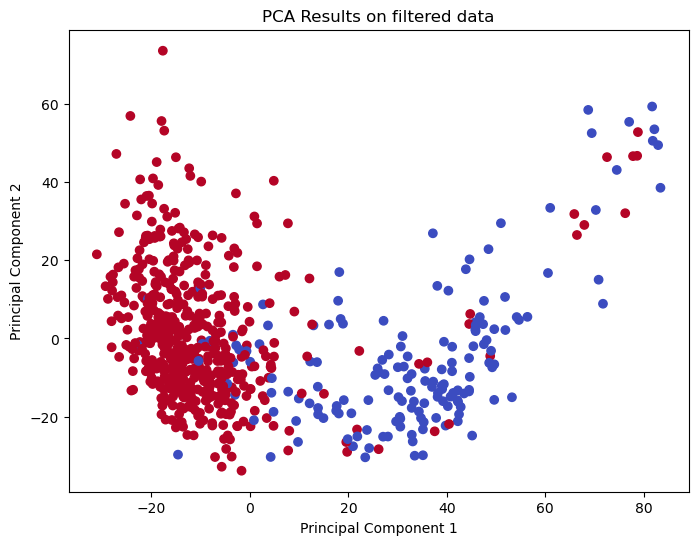

Principal Components:
[[-0.12610968 -0.1438398  -0.1254625  ... -0.00503426 -0.00614197
  -0.00779519]
 [-0.06209605  0.02254185  0.01350563 ...  0.01464467  0.01171447
   0.00578807]]


In [133]:

pca = PCA(n_components=2)  
pca_result = pca.fit_transform(afinaldf)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

color_map = {'Positive': 1, 'Negative': 0}
metadf['Color'] = metadf['ER'].map(color_map)

print("Explained variance ratio by each component:")
print(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=metadf['Color'], cmap='coolwarm')
plt.title("PCA Results on filtered data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

print("Principal Components:")
print(pca.components_)

In [134]:
#Prepping atdf for color scheme
atdf = tdf.drop(["GENETYPE", "GENESYMBOL"]) 
atdf = atdf.loc[metadf.index]

Explained variance ratio by each component:
[0.10732232 0.07225175]


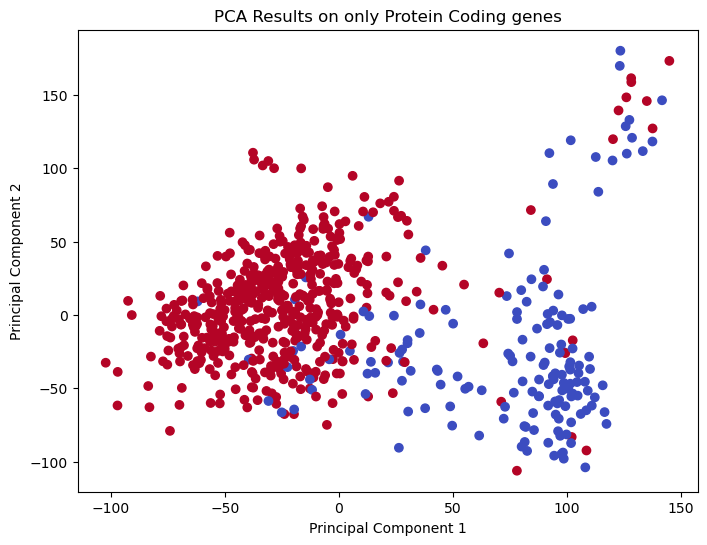

Principal Components:
[[ 0.00577007  0.00210879  0.0012453  ...  0.          0.00050624
   0.00365662]
 [ 0.00174964  0.02307679 -0.00681683 ...  0.          0.00335261
  -0.00058725]]


In [137]:
pca = PCA(n_components=2)  # You can choose the number of components you want to retain
pca_result = pca.fit_transform(atdf)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

print("Explained variance ratio by each component:")
print(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=metadf['Color'], cmap='coolwarm')
plt.title("PCA Results on only Protein Coding genes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

print("Principal Components:")
print(pca.components_)

In [138]:
#Prepping finalmtdf for color scheme
finalmtdf = mdf.T.drop(["GENETYPE", "GENESYMBOL"])
finalmtdf = finalmtdf.loc[metadf.index]

Explained variance ratio by each component:
[0.10880292 0.07885161]


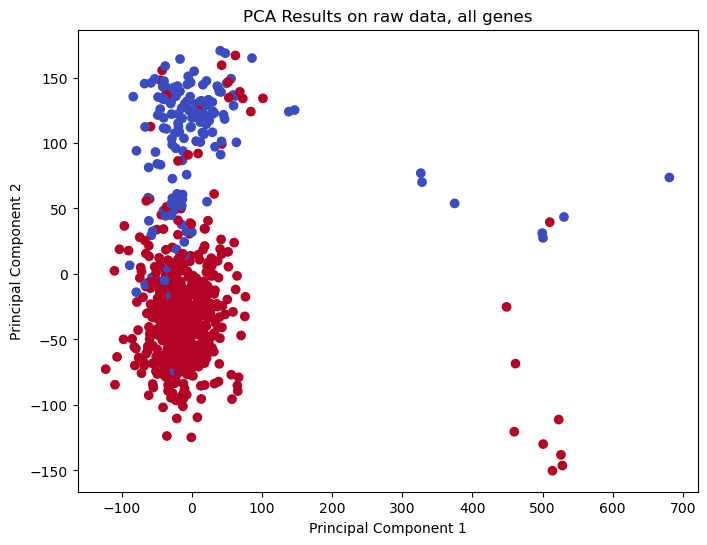

Principal Components:
[[ 0.00028333  0.00772955 -0.00213465 ...  0.          0.00247874
  -0.00133513]
 [ 0.00434139 -0.00099144  0.00173091 ... -0.         -0.00026237
   0.00339677]]


In [140]:
pca = PCA(n_components=2)  # You can choose the number of components you want to retain
pca_result = pca.fit_transform(finalmtdf)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

print("Explained variance ratio by each component:")
print(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=metadf['Color'], cmap='coolwarm')
plt.title("PCA Results on raw data, all genes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

print("Principal Components:")
print(pca.components_)